<a href="https://colab.research.google.com/github/earthianhivemind/DLlearning/blob/main/ML_Classification_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Techniques: Practical Examples
## Decision Trees & Support Vector Machines

This notebook demonstrates practical implementations of:
1. **Decision Trees** - Interpretable classification with tree-based splits
2. **Support Vector Machines** - Maximum margin classification with kernels

Each section includes:
- Dataset preparation
- Model training and evaluation
- Visualization
- Hyperparameter tuning
- Interpretability analysis

## 1. Setup and Imports

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn - datasets
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Scikit-learn - models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn - metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ All imports successful!")

✓ All imports successful!


---
# Part 1: Decision Trees

Decision trees recursively partition the feature space using if-then rules. They're highly interpretable and handle mixed data types naturally.

## 1.1 Simple Binary Classification Example

In [2]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=RANDOM_STATE
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {np.unique(y)}")

Training samples: 350
Testing samples: 150
Features: 2
Classes: [0 1]


In [3]:
# Train a simple decision tree
dt_simple = DecisionTreeClassifier(
    max_depth=3,
    random_state=RANDOM_STATE
)

dt_simple.fit(X_train, y_train)

# Make predictions
y_pred = dt_simple.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Performance (max_depth=3):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

Decision Tree Performance (max_depth=3):
  Accuracy:  0.9533
  Precision: 0.9250
  Recall:    0.9867
  F1-Score:  0.9548


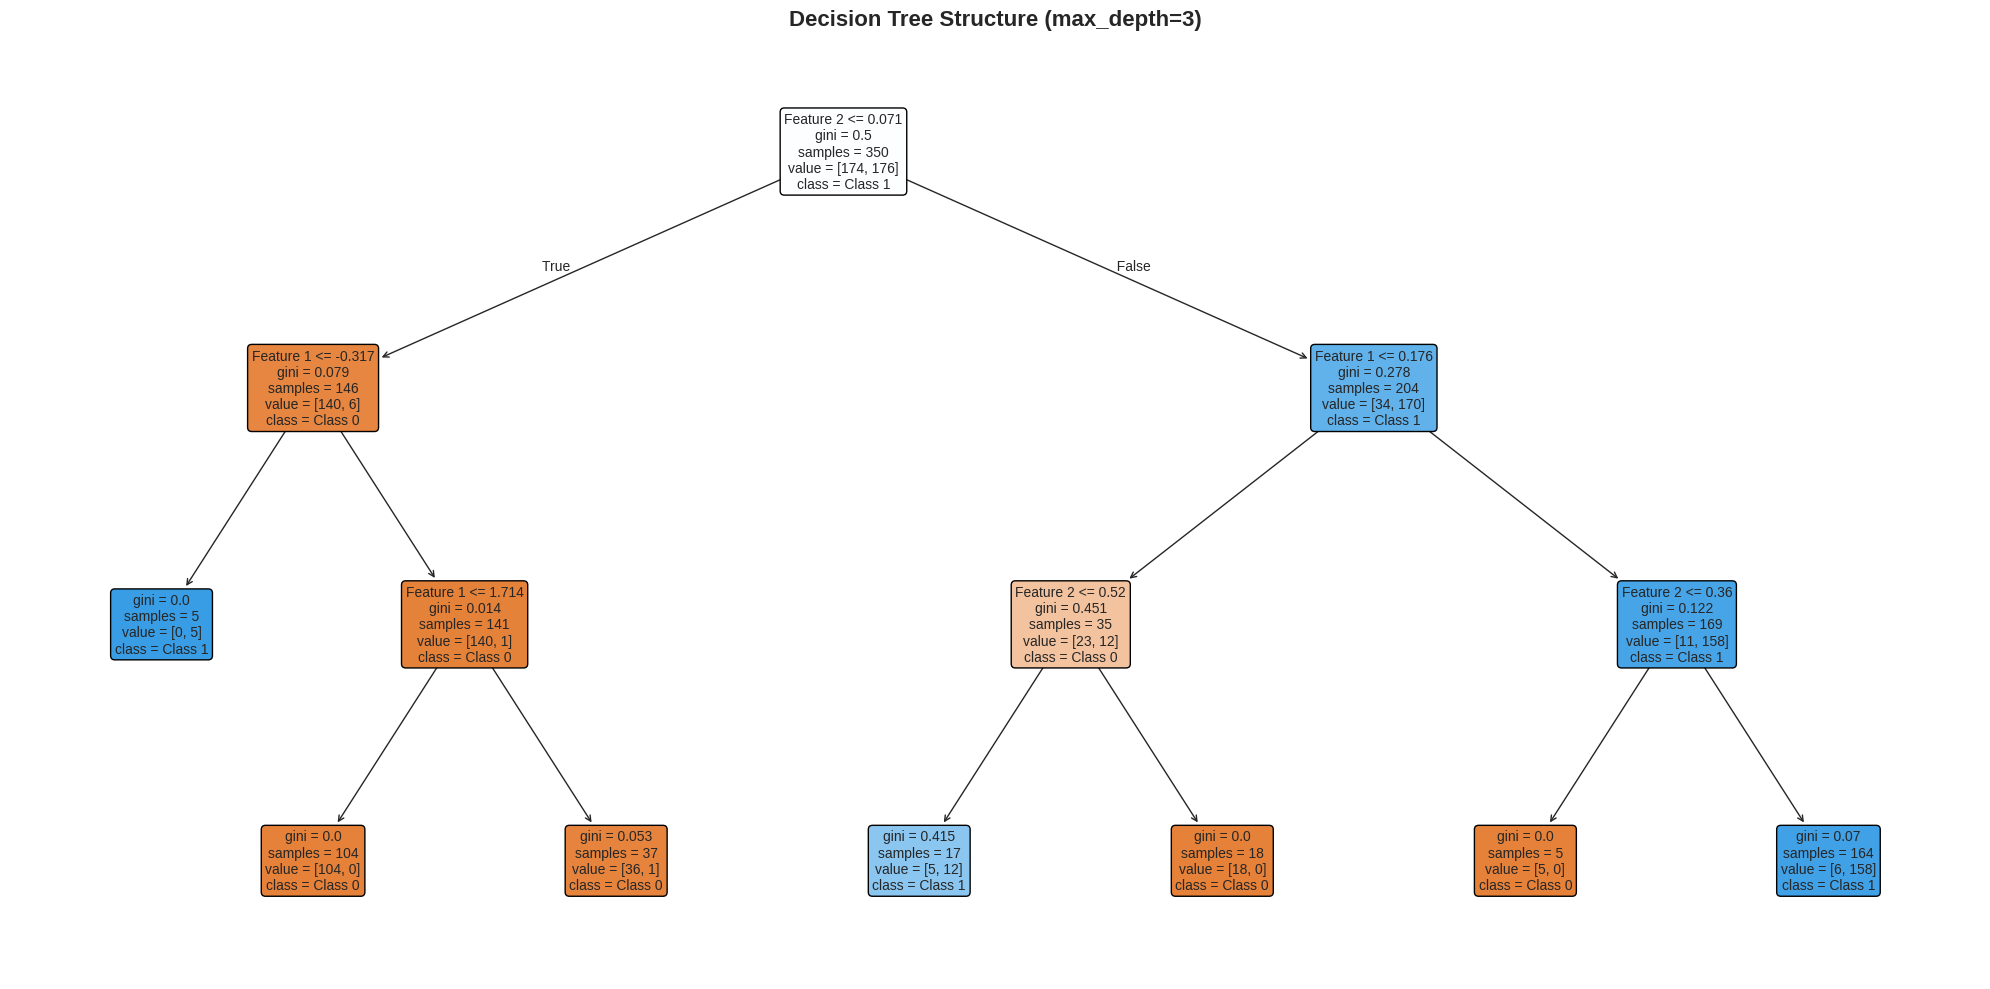

In [4]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_simple,
    feature_names=['Feature 1', 'Feature 2'],
    class_names=['Class 0', 'Class 1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Structure (max_depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

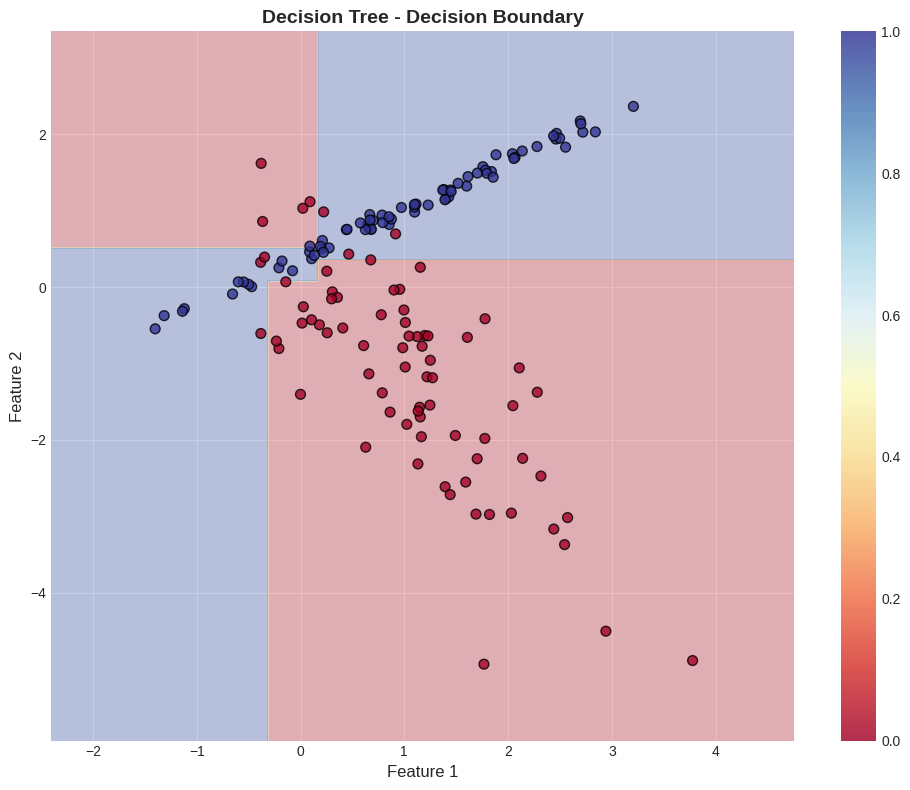

In [5]:
# Visualize decision boundary
def plot_decision_boundary(model, X, y, title):
    """
    Plot decision boundary for 2D classification.
    """
    h = 0.02  # step size in mesh

    # Create mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = plt.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap='RdYlBu',
        edgecolors='black',
        s=50, alpha=0.8
    )
    plt.colorbar(scatter)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_decision_boundary(
    dt_simple, X_test, y_test,
    'Decision Tree - Decision Boundary'
)

## 1.2 Multi-class Classification: Iris Dataset

In [6]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=RANDOM_STATE
)

print("Iris Dataset:")
print(f"  Total samples: {X_iris.shape[0]}")
print(f"  Features: {feature_names}")
print(f"  Classes: {target_names}")
print(f"\nClass distribution:")
for i, name in enumerate(target_names):
    count = np.sum(y_iris == i)
    print(f"  {name}: {count}")

Iris Dataset:
  Total samples: 150
  Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  Classes: ['setosa' 'versicolor' 'virginica']

Class distribution:
  setosa: 50
  versicolor: 50
  virginica: 50


In [7]:
# Train decision tree on Iris
dt_iris = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=5,
    random_state=RANDOM_STATE
)

dt_iris.fit(X_train_iris, y_train_iris)

# Predictions
y_pred_iris = dt_iris.predict(X_test_iris)

# Evaluation
print("Decision Tree on Iris Dataset:")
print(f"\nAccuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))

Decision Tree on Iris Dataset:

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



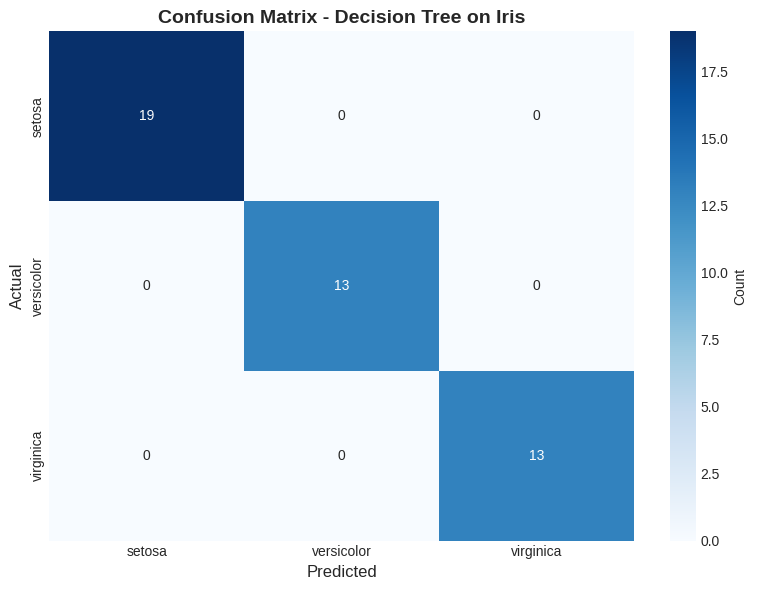

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test_iris, y_pred_iris)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    cbar_kws={'label': 'Count'}
)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - Decision Tree on Iris', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

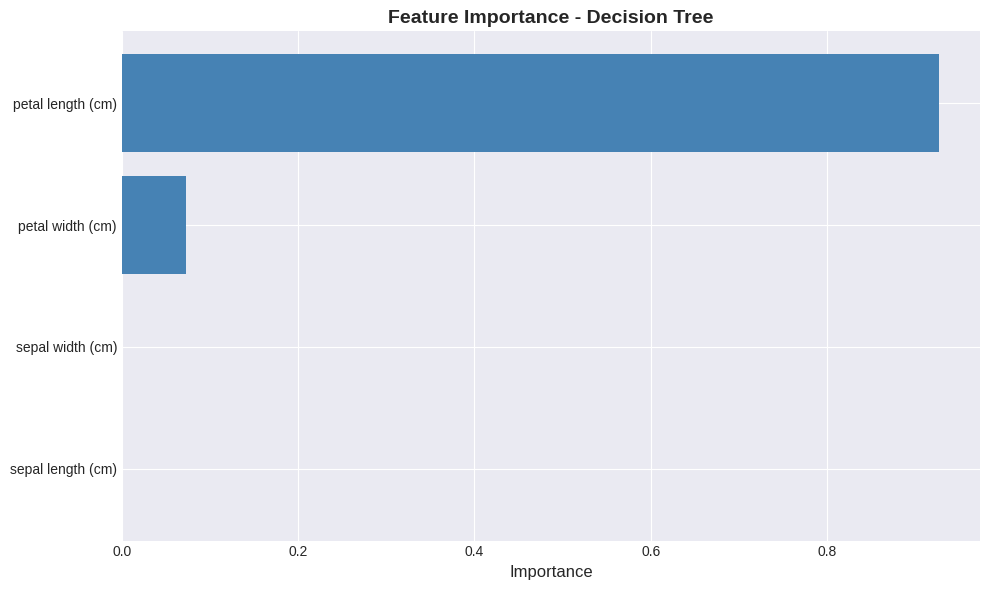


Feature Importance:
          Feature  Importance
petal length (cm)    0.927317
 petal width (cm)    0.072683
 sepal width (cm)    0.000000
sepal length (cm)    0.000000


In [9]:
# Feature importance
feature_importance = dt_iris.feature_importances_
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_df.to_string(index=False))

## 1.3 Hyperparameter Tuning

In [10]:
# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
dt_grid = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_search = GridSearchCV(
    dt_grid,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Performing Grid Search...")
grid_search.fit(X_train_iris, y_train_iris)

print("\n" + "="*60)
print("Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Test set performance
best_dt = grid_search.best_estimator_
y_pred_tuned = best_dt.predict(X_test_iris)
test_accuracy = accuracy_score(y_test_iris, y_pred_tuned)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("="*60)

Performing Grid Search...
Fitting 5 folds for each of 224 candidates, totalling 1120 fits

Best Parameters:
  criterion: gini
  max_depth: 4
  min_samples_leaf: 1
  min_samples_split: 10

Best Cross-Validation Score: 0.9429
Test Set Accuracy: 1.0000


## 1.4 Overfitting Analysis

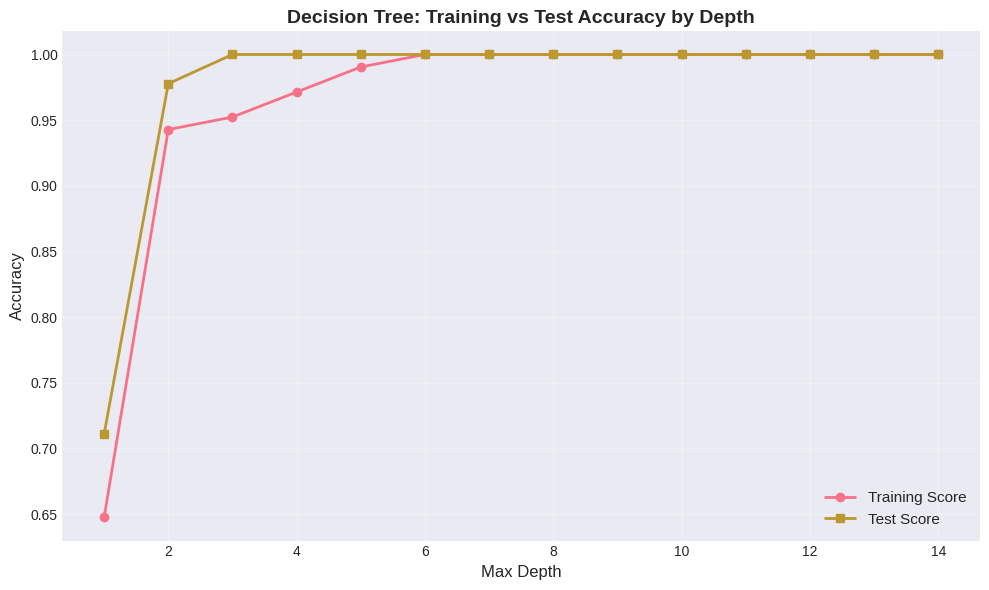

Optimal max_depth: 3
Test accuracy at optimal depth: 1.0000


In [11]:
# Compare different tree depths
max_depths = range(1, 15)
train_scores = []
test_scores = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    dt.fit(X_train_iris, y_train_iris)

    train_scores.append(dt.score(X_train_iris, y_train_iris))
    test_scores.append(dt.score(X_test_iris, y_test_iris))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, marker='o', label='Training Score', linewidth=2)
plt.plot(max_depths, test_scores, marker='s', label='Test Score', linewidth=2)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Decision Tree: Training vs Test Accuracy by Depth', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find optimal depth
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"Optimal max_depth: {optimal_depth}")
print(f"Test accuracy at optimal depth: {max(test_scores):.4f}")

---
# Part 2: Support Vector Machines (SVM)

SVMs find the optimal hyperplane that maximizes the margin between classes. They can handle non-linear boundaries using the kernel trick.

## 2.1 Linear SVM Example

In [12]:
# Generate linearly separable data
X_linear, y_linear = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=RANDOM_STATE
)

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=RANDOM_STATE
)

# Standardize features (important for SVM!)
scaler = StandardScaler()
X_train_lin_scaled = scaler.fit_transform(X_train_lin)
X_test_lin_scaled = scaler.transform(X_test_lin)

print("Linear SVM Dataset:")
print(f"  Training samples: {X_train_lin.shape[0]}")
print(f"  Test samples: {X_test_lin.shape[0]}")

Linear SVM Dataset:
  Training samples: 140
  Test samples: 60


In [13]:
# Train linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=RANDOM_STATE)
svm_linear.fit(X_train_lin_scaled, y_train_lin)

# Predictions
y_pred_lin = svm_linear.predict(X_test_lin_scaled)

# Evaluation
print("Linear SVM Performance:")
print(f"  Accuracy:  {accuracy_score(y_test_lin, y_pred_lin):.4f}")
print(f"  Precision: {precision_score(y_test_lin, y_pred_lin):.4f}")
print(f"  Recall:    {recall_score(y_test_lin, y_pred_lin):.4f}")
print(f"  F1-Score:  {f1_score(y_test_lin, y_pred_lin):.4f}")
print(f"\nNumber of support vectors: {svm_linear.n_support_}")
print(f"Total support vectors: {sum(svm_linear.n_support_)}")

Linear SVM Performance:
  Accuracy:  0.9833
  Precision: 1.0000
  Recall:    0.9615
  F1-Score:  0.9804

Number of support vectors: [10  9]
Total support vectors: 19


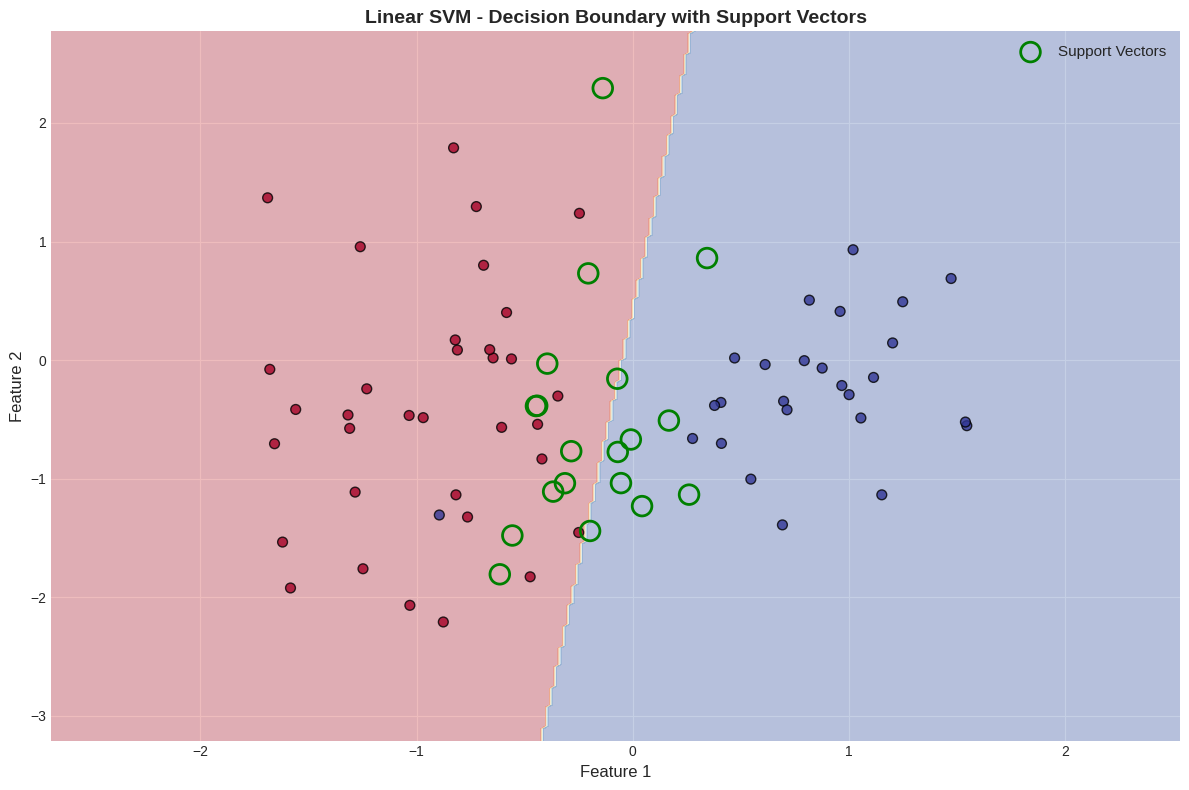

In [14]:
# Visualize SVM decision boundary with margin
def plot_svm_decision_boundary(model, X, y, title):
    """
    Plot SVM decision boundary with support vectors and margin.
    """
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

    # Plot data points
    plt.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap='RdYlBu',
        edgecolors='black',
        s=50, alpha=0.8
    )

    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=200, linewidth=2,
        facecolors='none',
        edgecolors='green',
        label='Support Vectors'
    )

    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

plot_svm_decision_boundary(
    svm_linear, X_test_lin_scaled, y_test_lin,
    'Linear SVM - Decision Boundary with Support Vectors'
)

## 2.2 Non-linear Classification with RBF Kernel

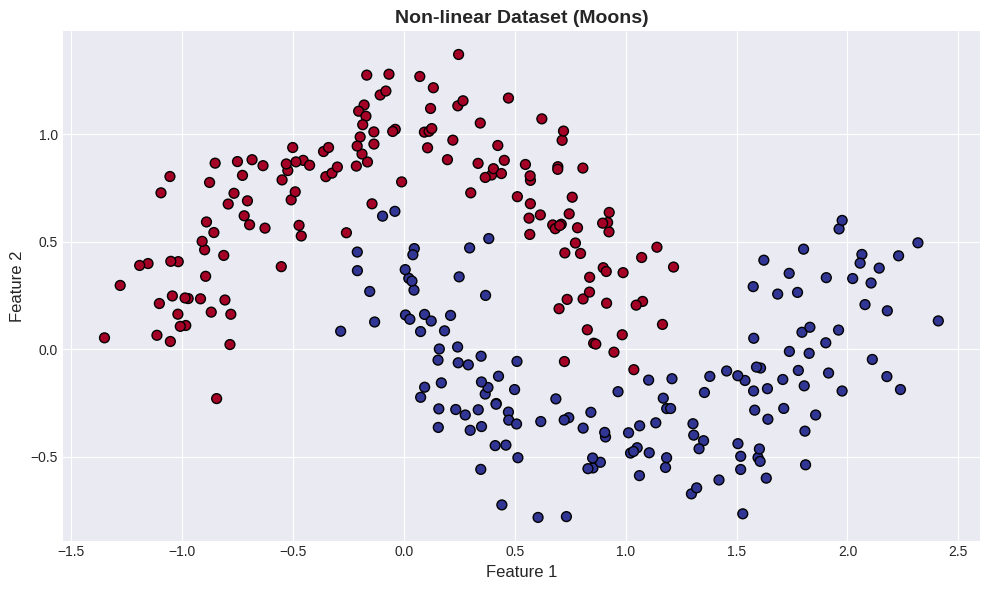

In [15]:
# Generate non-linearly separable data
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=300, noise=0.15, random_state=RANDOM_STATE)

X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=RANDOM_STATE
)

# Scale data
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

# Visualize raw data
plt.figure(figsize=(10, 6))
plt.scatter(
    X_moons[:, 0], X_moons[:, 1],
    c=y_moons, cmap='RdYlBu',
    edgecolors='black', s=50
)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Non-linear Dataset (Moons)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

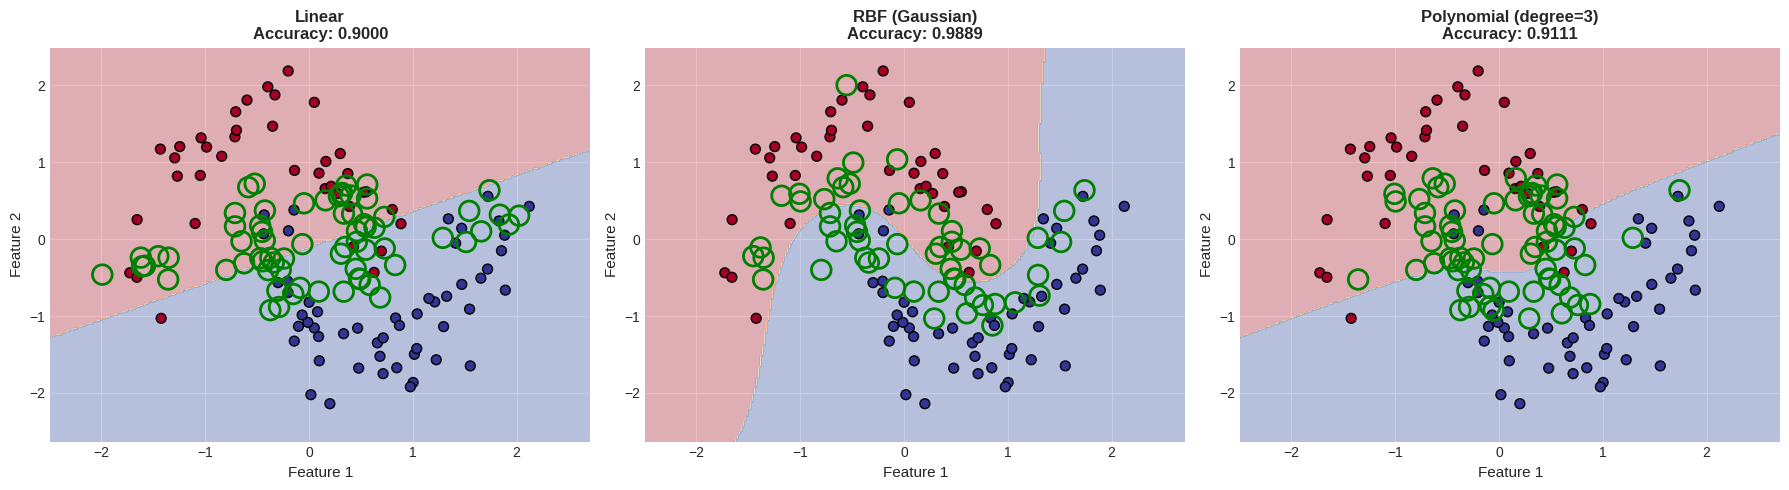

Kernel Comparison:
  Linear              : 0.9000
  RBF (Gaussian)      : 0.9889
  Polynomial (degree=3): 0.9111


In [16]:
# Compare different kernels
kernels = ['linear', 'rbf', 'poly']
kernel_names = ['Linear', 'RBF (Gaussian)', 'Polynomial (degree=3)']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (kernel, name) in enumerate(zip(kernels, kernel_names)):
    # Train SVM with different kernel
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=1.0, degree=3, random_state=RANDOM_STATE)
    else:
        svm = SVC(kernel=kernel, C=1.0, random_state=RANDOM_STATE)

    svm.fit(X_train_moons_scaled, y_train_moons)

    # Make predictions
    y_pred = svm.predict(X_test_moons_scaled)
    accuracy = accuracy_score(y_test_moons, y_pred)

    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_train_moons_scaled[:, 0].min() - 0.5, X_train_moons_scaled[:, 0].max() + 0.5
    y_min, y_max = X_train_moons_scaled[:, 1].min() - 0.5, X_train_moons_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].scatter(
        X_test_moons_scaled[:, 0], X_test_moons_scaled[:, 1],
        c=y_test_moons, cmap='RdYlBu',
        edgecolors='black', s=50
    )
    axes[idx].scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=200, linewidth=2,
        facecolors='none',
        edgecolors='green'
    )
    axes[idx].set_xlabel('Feature 1', fontsize=11)
    axes[idx].set_ylabel('Feature 2', fontsize=11)
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy:.4f}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Kernel Comparison:")
for kernel, name in zip(kernels, kernel_names):
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=1.0, degree=3, random_state=RANDOM_STATE)
    else:
        svm = SVC(kernel=kernel, C=1.0, random_state=RANDOM_STATE)
    svm.fit(X_train_moons_scaled, y_train_moons)
    score = svm.score(X_test_moons_scaled, y_test_moons)
    print(f"  {name:20s}: {score:.4f}")

## 2.3 Real-world Example: Breast Cancer Classification

In [17]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
feature_names_cancer = cancer.feature_names
target_names_cancer = cancer.target_names

print("Breast Cancer Dataset:")
print(f"  Samples: {X_cancer.shape[0]}")
print(f"  Features: {X_cancer.shape[1]}")
print(f"  Classes: {target_names_cancer}")
print(f"\nClass distribution:")
for i, name in enumerate(target_names_cancer):
    count = np.sum(y_cancer == i)
    percentage = 100 * count / len(y_cancer)
    print(f"  {name}: {count} ({percentage:.1f}%)")

Breast Cancer Dataset:
  Samples: 569
  Features: 30
  Classes: ['malignant' 'benign']

Class distribution:
  malignant: 212 (37.3%)
  benign: 357 (62.7%)


In [18]:
# Split and scale data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=RANDOM_STATE, stratify=y_cancer
)

scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# Train SVM with RBF kernel
svm_cancer = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=RANDOM_STATE)
svm_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Predictions
y_pred_cancer = svm_cancer.predict(X_test_cancer_scaled)

# Evaluation
print("SVM on Breast Cancer Dataset:")
print(f"\nAccuracy: {accuracy_score(y_test_cancer, y_pred_cancer):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, target_names=target_names_cancer))

SVM on Breast Cancer Dataset:

Accuracy: 0.9766

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



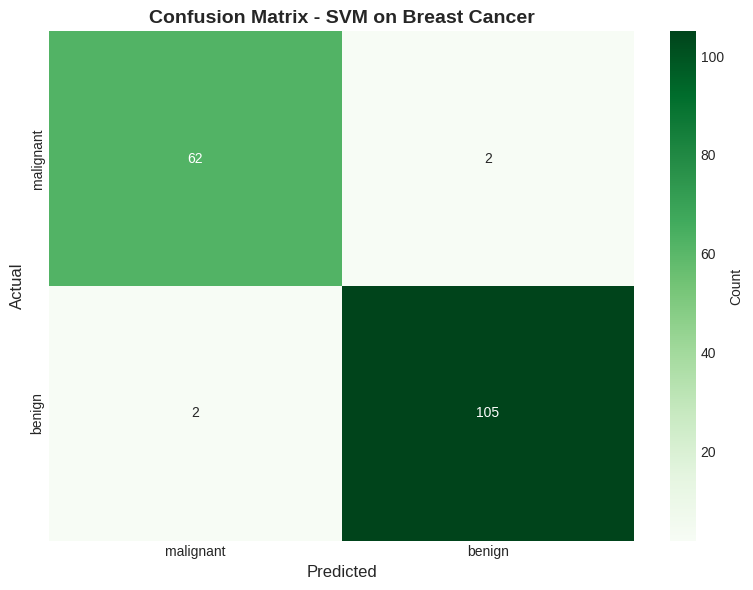

In [19]:
# Confusion matrix
cm_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_cancer, annot=True, fmt='d', cmap='Greens',
    xticklabels=target_names_cancer,
    yticklabels=target_names_cancer,
    cbar_kws={'label': 'Count'}
)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - SVM on Breast Cancer', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2.4 SVM Hyperparameter Tuning

In [20]:
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly']
}

# Grid search
svm_grid = SVC(random_state=RANDOM_STATE)
grid_search_svm = GridSearchCV(
    svm_grid,
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Performing Grid Search for SVM...")
grid_search_svm.fit(X_train_cancer_scaled, y_train_cancer)

print("\n" + "="*60)
print("Best Parameters:")
for param, value in grid_search_svm.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation Score: {grid_search_svm.best_score_:.4f}")

# Test set performance
best_svm = grid_search_svm.best_estimator_
y_pred_tuned_svm = best_svm.predict(X_test_cancer_scaled)
test_accuracy_svm = accuracy_score(y_test_cancer, y_pred_tuned_svm)
print(f"Test Set Accuracy: {test_accuracy_svm:.4f}")
print("="*60)

Performing Grid Search for SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
  C: 10
  gamma: 0.001
  kernel: rbf

Best Cross-Validation Score: 0.9799
Test Set Accuracy: 0.9708


## 2.5 Effect of C and Gamma Parameters

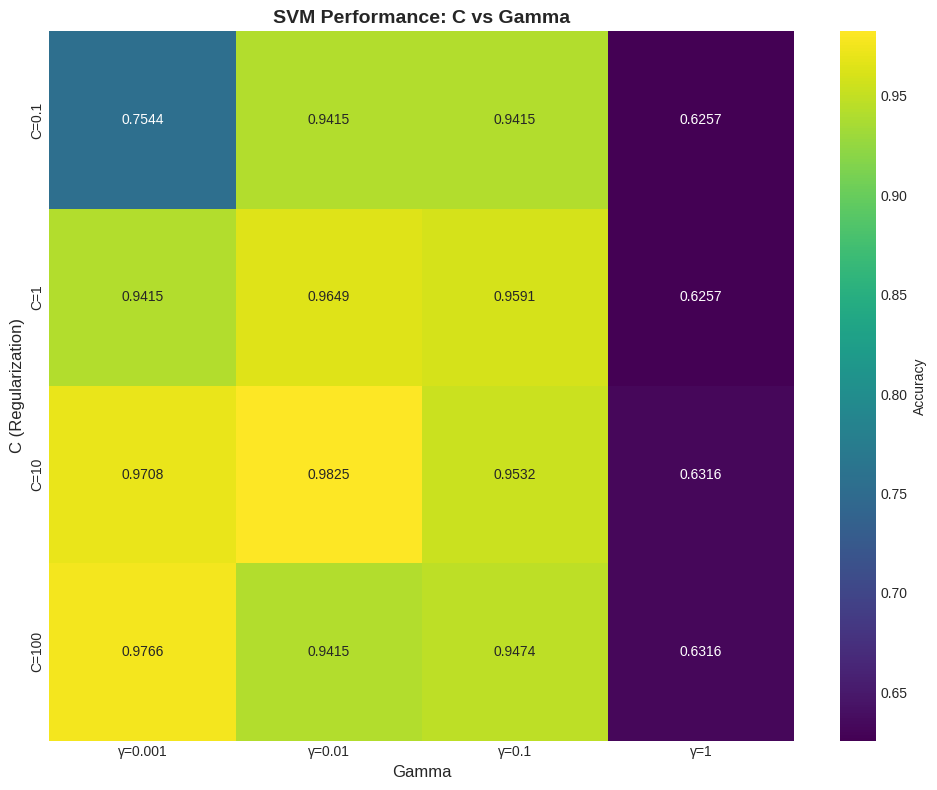


Best combination:
  C = 10
  gamma = 0.01
  Accuracy = 0.9825


In [21]:
# Analyze C and gamma parameters
C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]

scores = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        svm = SVC(kernel='rbf', C=C, gamma=gamma, random_state=RANDOM_STATE)
        svm.fit(X_train_cancer_scaled, y_train_cancer)
        scores[i, j] = svm.score(X_test_cancer_scaled, y_test_cancer)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    scores, annot=True, fmt='.4f', cmap='viridis',
    xticklabels=[f'γ={g}' for g in gamma_values],
    yticklabels=[f'C={c}' for c in C_values],
    cbar_kws={'label': 'Accuracy'}
)
plt.xlabel('Gamma', fontsize=12)
plt.ylabel('C (Regularization)', fontsize=12)
plt.title('SVM Performance: C vs Gamma', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find best combination
best_idx = np.unravel_index(scores.argmax(), scores.shape)
best_C = C_values[best_idx[0]]
best_gamma = gamma_values[best_idx[1]]
best_score = scores[best_idx]

print(f"\nBest combination:")
print(f"  C = {best_C}")
print(f"  gamma = {best_gamma}")
print(f"  Accuracy = {best_score:.4f}")

---
# Part 3: Model Comparison

## 3.1 Side-by-Side Comparison on Iris Dataset

In [22]:
# Scale Iris data for fair SVM comparison
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

# Train multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'SVM (Linear)': SVC(kernel='linear', random_state=RANDOM_STATE),
    'SVM (RBF)': SVC(kernel='rbf', random_state=RANDOM_STATE)
}

results = {}

print("Model Comparison on Iris Dataset:")
print("=" * 70)

for name, model in models.items():
    # Use scaled data for SVM, original for trees
    if 'SVM' in name:
        model.fit(X_train_iris_scaled, y_train_iris)
        y_pred = model.predict(X_test_iris_scaled)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_iris_scaled, y_train_iris, cv=5)
    else:
        model.fit(X_train_iris, y_train_iris)
        y_pred = model.predict(X_test_iris)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_iris, y_train_iris, cv=5)

    # Calculate metrics
    accuracy = accuracy_score(y_test_iris, y_pred)
    precision = precision_score(y_test_iris, y_pred, average='weighted')
    recall = recall_score(y_test_iris, y_pred, average='weighted')
    f1 = f1_score(y_test_iris, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  CV Score:  {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

print("\n" + "=" * 70)

Model Comparison on Iris Dataset:

Decision Tree:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  CV Score:  0.9333 (±0.0233)

Random Forest:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  CV Score:  0.9429 (±0.0356)

SVM (Linear):
  Accuracy:  0.9778
  Precision: 0.9794
  Recall:    0.9778
  F1-Score:  0.9777
  CV Score:  0.9429 (±0.0356)

SVM (RBF):
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  CV Score:  0.9429 (±0.0356)



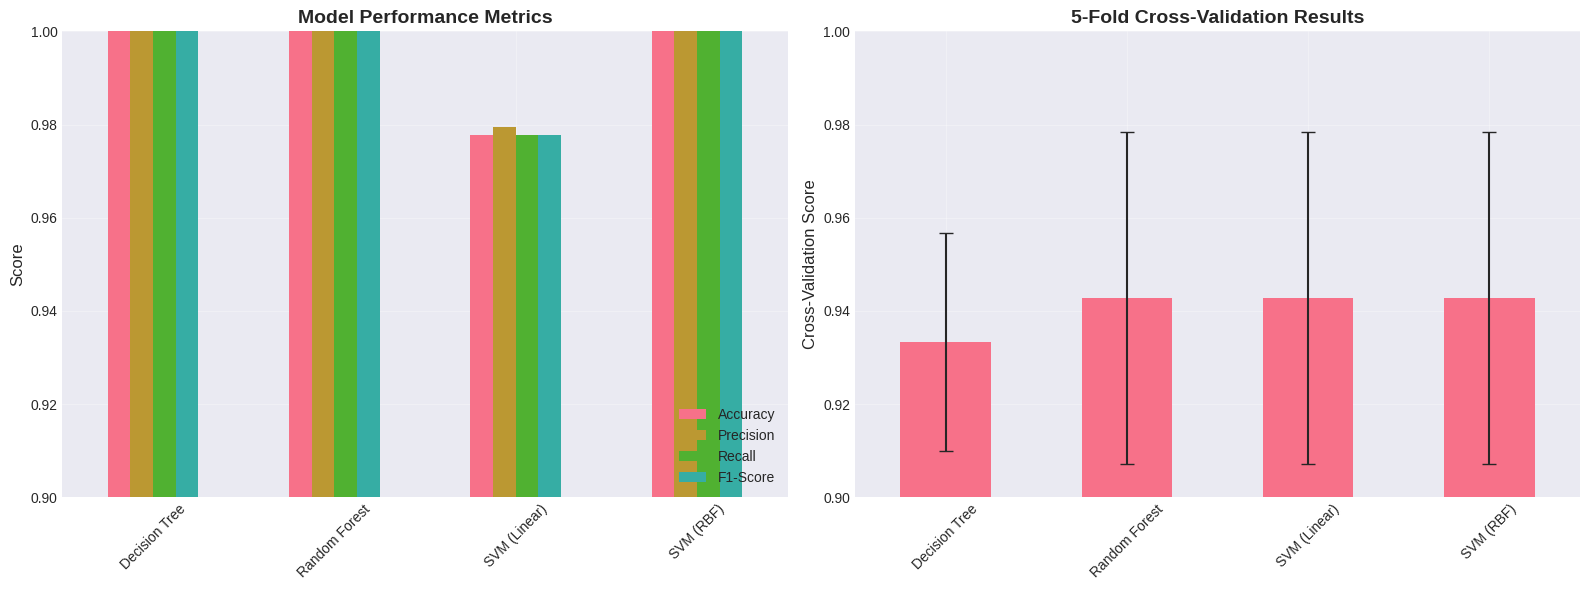

In [23]:
# Visualize comparison
results_df = pd.DataFrame(results).T

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df[metrics].plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0.9, 1.0])

# Plot 2: Cross-validation scores
cv_data = results_df[['CV Mean']]
cv_errors = results_df[['CV Std']]
cv_data.plot(kind='bar', yerr=cv_errors.values.T, ax=axes[1], legend=False, rot=45, capsize=5)
axes[1].set_ylabel('Cross-Validation Score', fontsize=12)
axes[1].set_title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.9, 1.0])

plt.tight_layout()
plt.show()

## 3.2 Key Insights and Recommendations

In [24]:
# Create comprehensive summary
summary_data = {
    'Algorithm': ['Decision Tree', 'SVM (RBF)'],
    'Best For': [
        'Interpretability, mixed data types, quick prototyping',
        'High dimensions, small datasets, clear margins'
    ],
    'Strengths': [
        'Easy to interpret, no scaling needed, handles non-linear',
        'Effective in high dims, memory efficient, robust'
    ],
    'Weaknesses': [
        'Prone to overfitting, high variance, greedy',
        'Slow on large data, hyperparameter sensitive'
    ],
    'Preprocessing': [
        'Minimal (no scaling required)',
        'Feature scaling essential'
    ],
    'Training Speed': ['Fast', 'Moderate to Slow'],
    'Prediction Speed': ['Very Fast', 'Fast']
}

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*100)
print("ALGORITHM COMPARISON SUMMARY")
print("="*100)
print(summary_df.to_string(index=False))
print("="*100)


ALGORITHM COMPARISON SUMMARY
    Algorithm                                              Best For                                                Strengths                                   Weaknesses                 Preprocessing   Training Speed Prediction Speed
Decision Tree Interpretability, mixed data types, quick prototyping Easy to interpret, no scaling needed, handles non-linear  Prone to overfitting, high variance, greedy Minimal (no scaling required)             Fast        Very Fast
    SVM (RBF)        High dimensions, small datasets, clear margins         Effective in high dims, memory efficient, robust Slow on large data, hyperparameter sensitive     Feature scaling essential Moderate to Slow             Fast


## Practical Recommendations

### When to use Decision Trees:
- ✅ Interpretability is critical (medical, finance, legal)
- ✅ Mixed categorical and numerical features
- ✅ Need to extract business rules
- ✅ Quick baseline model
- ❌ Avoid for production without ensembling (use Random Forest instead)

### When to use SVMs:
- ✅ High-dimensional feature spaces (text, genomics)
- ✅ Clear margin of separation exists
- ✅ Small to medium datasets (<100K samples)
- ✅ Need robust performance with limited data
- ❌ Avoid for very large datasets or when speed is critical

### General Tips:
1. **Always scale features for SVM** - Use StandardScaler or MinMaxScaler
2. **Start simple** - Begin with default parameters, then tune
3. **Use cross-validation** - Get reliable performance estimates
4. **Consider ensembles** - Random Forest often beats single decision tree
5. **Monitor overfitting** - Use validation curves and learning curves

---
# Conclusion

This notebook demonstrated:

1. **Decision Trees**
   - Simple binary classification
   - Multi-class classification (Iris)
   - Feature importance analysis
   - Hyperparameter tuning
   - Overfitting analysis

2. **Support Vector Machines**
   - Linear SVM with support vectors
   - Non-linear classification with kernels
   - Real-world medical diagnosis (breast cancer)
   - Hyperparameter optimization (C and gamma)
   - Kernel comparison

3. **Model Comparison**
   - Side-by-side performance metrics
   - Cross-validation results
   - Practical recommendations

**Next Steps:**
- Experiment with your own datasets
- Try ensemble methods (Random Forest, XGBoost)
- Explore advanced SVM techniques (one-class SVM, SVR)
- Compare with neural networks for complex tasks

---
**Author:** ML Classification Tutorial  
**Date:** February 2026  
**Libraries:** scikit-learn, numpy, pandas, matplotlib, seaborn